In [1]:
import os
import pandas
from scipy.misc import imread
data_dir = "GTSDB/"
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [57]:

#leftCol#;##topRow#;#rightCol#;#bottomRow#;#ClassID#

labels = pandas.read_csv(os.path.join(data_dir, "gt.txt"), sep=";", header=None, 
                         names=("file_name", "x_min", "y_min", "x_max", "y_max", "label"))
label_cnt = labels.groupby("file_name")["label"].count()
for file in os.listdir(data_dir):
    name, ext = os.path.splitext(file)
    if (ext == ".ppm") and (file not in label_cnt.index):
        label_cnt.loc[file] = 0
print("Avg sign/pic: " + str(label_cnt.mean()))
print("Max sign/pic: " + str(label_cnt.max()))

Avg sign/pic: 1.3477777777777777
Max sign/pic: 6


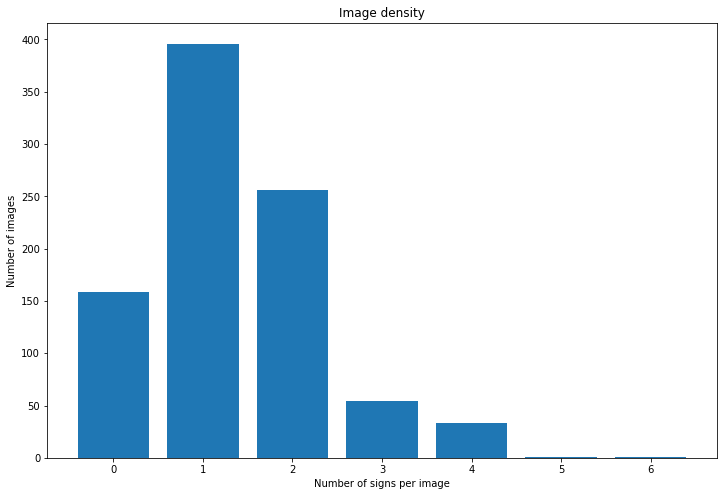

[159, 396, 256, 54, 33, 1, 1]

In [67]:
label_cnt = list(label_cnt)
cnt = []
for i in range(max(label_cnt)+1):
    cnt.append(label_cnt.count(i))
plt.bar(range(len(cnt)), cnt)
plt.xlabel("Number of signs per image")
plt.ylabel("Number of images")
plt.title("Image density")
plt.show()
cnt

In [4]:
def draw_rectangle(pic, x_min, y_min, x_max, y_max, size=10, color=(0,0,0)):
    pic[y_min:y_max, x_min-size:x_min] = color
    pic[y_min:y_max, x_max:x_max+size] = color
    pic[y_min-size:y_min, x_min:x_max] = color
    pic[y_max:y_max+size, x_min:x_max] = color
    return pic

In [7]:
label_cnt = labels.groupby("file_name")["label"].count()
pic_with_multy_signs = label_cnt[label_cnt > 2].index[1]
img = imread(os.path.join(data_dir, pic_name))
img2 = img.copy()
for row in labels[labels["file_name"] == pic_name.replace("jpg", "ppm")].iterrows():
    row = row[1]
    print(row)
    img = draw_rectangle(img, int(row["x_min"]),int(row["y_min"]),int(row["x_max"]),int(row["y_max"]))
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'GTSDB/5123.ppm'

In [14]:
labels[labels["label"] == 1]

,file_name,x_min,y_min,x_max,y_max,label


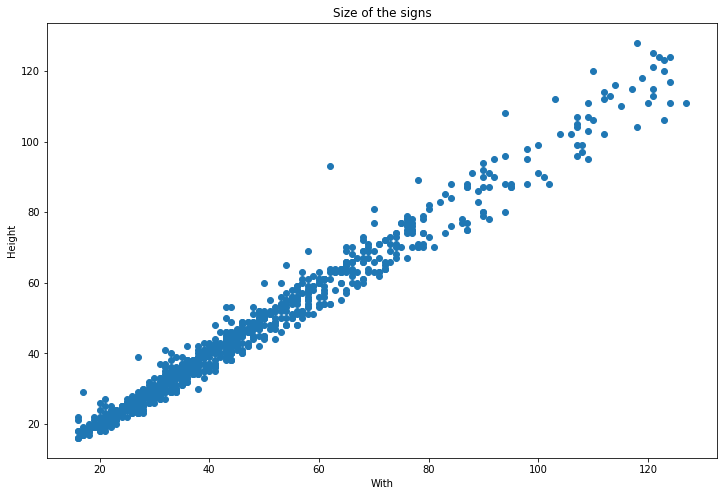

In [19]:
height = []
width = []
for row in labels.iterrows():
    row = row[1]
    x_min = row["x_min"]
    y_min = row["y_min"]
    x_max = row["x_max"]
    y_max = row["y_max"]
    height.append(y_max-y_min)
    width.append(x_max-x_min)
fig, ax = plt.subplots()
ax.plot(width, height, 'o')
ax.set_xlabel("With")
ax.set_ylabel("Height")
ax.set_title("Size of the signs")
plt.show()


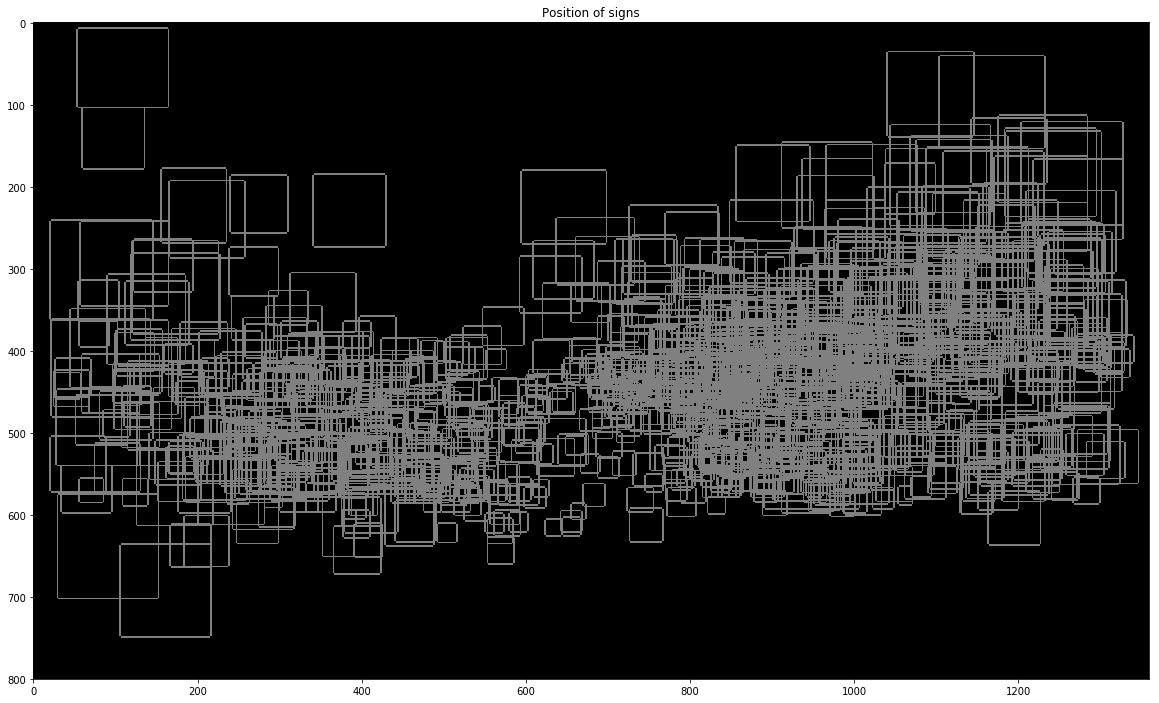

In [29]:
import numpy as np
boxes = np.zeros((800,1360,3))
for row in labels.iterrows():
    row = row[1]
    x_min = row["x_min"]
    y_min = row["y_min"]
    x_max = row["x_max"]
    y_max = row["y_max"]
    boxes = draw_rectangle(boxes, x_min, y_min, x_max, y_max, size=2, color=(128,128,128))
plt.figure(figsize = (20,20))
plt.imshow(boxes)
plt.title("Position of signs")
plt.show()

In [60]:
label_file_name_lookup = []
for i in range(43):
    label_file_name_lookup.append(labels[labels["label"] == i]["file_name"].tolist())

2
38
28.2093023256


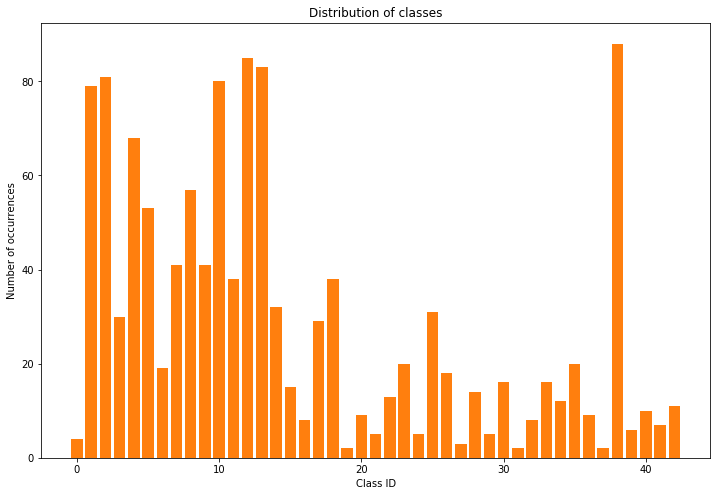

In [64]:
file_per_classs = []
for e in label_file_name_lookup:
    file_per_classs.append(len(e))
print(min(file_per_classs))
print(np.argmax(file_per_classs))
print(np.mean(file_per_classs))
plt.bar(range(len(file_per_classs)), file_per_classs)
plt.xlabel("Class ID")
plt.ylabel("Number of occurrences")
plt.title("Distribution of classes")
plt.show()

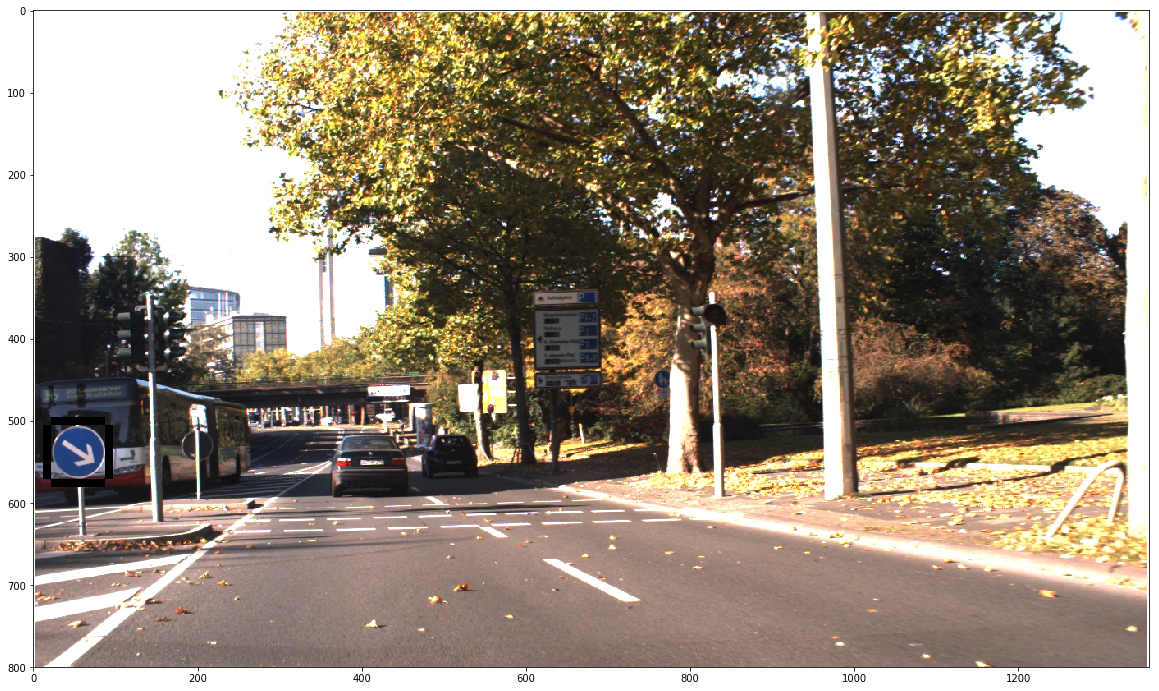

In [12]:
img = imread(data_dir+"00033.ppm")
img2 = img.copy()
for row in labels[labels["file_name"] == "00033.ppm"].iterrows():
    row = row[1]
    img2 = draw_rectangle(img2, int(row["x_min"]),int(row["y_min"]),int(row["x_max"]),int(row["y_max"]))
plt.figure(figsize = (20,20))
plt.imshow(img2)
plt.show()